Notebook 2: modeling

In [735]:
#   Importing libraries
import re   #regular expressions
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import datetime as dt
import math

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf 
%matplotlib inline


# Importing data

See accompanying notebook: 'Project_2_scraping_and_cleaning_final'.

In [717]:
modern_df = pd.read_pickle('modern_df_ready_for_model_10-8-20_PICKLE')

In [718]:
len(modern_df.columns)

17

In [719]:
modern_df.shape

(15899, 17)

In [720]:
modern_df.head()

,expansion,rarity,cost,cmc,color_identity,rules_text,price,is_w,is_u,is_b,is_r,is_g,rarity_num,rules_text_len,num_printings,rel_date,time_since_release
name,,,,,,,,,,,,,,,,,
Gideon of the Trials,Amonkhet,M,1ww,3,w,"[+1]: Until your next turn, prevent all damage...",6.99,1,0,0,0,0,4,401,1,2017-04-28,1259.0
Force of Negation,Modern Horizons,R,1uu,3,u,"If it's not your turn, you may exile a blue ca...",54.99,0,1,0,0,0,3,234,1,2019-06-14,482.0
Polluted Delta,Khans of Tarkir,R,,0,colorless,", Pay 1 life, Sacrifice Polluted Delta: Search...",32.99,0,0,0,0,0,3,136,1,2014-09-26,2204.0
Cavern of Souls,Avacyn Restored,R,,0,colorless,"As Cavern of Souls enters the battlefield, cho...",79.99,0,0,0,0,0,3,204,1,2012-05-04,3079.0
Wooded Foothills,Khans of Tarkir,R,,0,colorless,", Pay 1 life, Sacrifice Wooded Foothills: Sear...",29.99,0,0,0,0,0,3,140,1,2014-09-26,2204.0


## Features and target

In [778]:
features = modern_df[['rarity_num', 'num_printings', 'time_since_release', 'rules_text_len', 'cmc', 'is_w', 'is_u','is_b', 'is_r', 'is_g']]

target = modern_df['price']

In [779]:
features.dtypes

rarity_num              int64
num_printings           int64
time_since_release    float64
rules_text_len          int64
cmc                     int64
is_w                    int64
is_u                    int64
is_b                    int64
is_r                    int64
is_g                    int64
dtype: object

In [780]:
features.shape, target.shape

((15899, 10), (15899,))

# Testing basic model

In [760]:
lm = LinearRegression()

lm.fit(features,target)

for feature, coeff in zip(features.columns,lm.coef_):
    print('feature: ', feature, ',', 'coeff: ', coeff)


feature:  rarity_num , coeff:  2.0303120955092635
feature:  num_printings , coeff:  0.0666411528988905
feature:  time_since_release , coeff:  0.00014014008966362632
feature:  rules_text_len , coeff:  0.0003615674102219052
feature:  cmc , coeff:  -0.25605444604785843
feature:  is_w , coeff:  -0.9135592863291709
feature:  is_u , coeff:  -0.7193419357927896
feature:  is_b , coeff:  -0.5736590653552064
feature:  is_r , coeff:  -1.094814313287997
feature:  is_g , coeff:  -0.5435871080172031


## Comparing to statsmodel

In [761]:
model = sm.OLS(target,features) # Same as sklearn linear regression

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.221
Model:                            OLS   Adj. R-squared (uncentered):              0.221
Method:                 Least Squares   F-statistic:                              451.4
Date:                Sat, 10 Oct 2020   Prob (F-statistic):                        0.00
Time:                        15:14:21   Log-Likelihood:                         -45878.
No. Observations:               15899   AIC:                                  9.178e+04
Df Residuals:                   15889   BIC:                                  9.185e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
rarity_num             1.8792      0.040     46.723      0.000       1.800       1.958
num_printings         -0.0425      0.022     -1.907      0.056      -0.086       0.001
time_since_release  4.704e-05    1.7e-05      2.760      0.006    1.36e-05    8.05e-05
rules_text_len        -0.0013      0.000     -2.874      0.004      -0.002      -0.000
cmc                   -0.3051      0.021    -14.769      0.000      -0.346      -0.265
is_w                  -1.2458      0.094    -13.238      0.000      -1.430      -1.061
is_u                  -1.0060      0.096    -10.505      0.000      -1.194      -0.818
is_b                  -0.8649      0.096     -9.024      0.000      -1.053      -0.677
is_r                  -1.3933      0.095    -14.594      0.000      -1.580      -1.206
is_g                  -0.8257      0.096     -8.573      0.000      -1.014      -0.637
==============================================================================
Omnibus:                    22400.383   Durbin-Watson:                   1.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7512309.117
Skew:                           8.329   Prob(JB):                         0.00
Kurtosis:                     108.179   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Important features: 
* rarity_num (+)
* num_printings (-, barely not significant)
* cmc (-)

rarity has highest negative correlation for red cards: red efficient cards tend to be more expensive -- see burn, prowess, blitz

# KF validation on 6 models

## Setting variables

In [781]:
features = modern_df[['rarity_num', 'num_printings', 'time_since_release', 'rules_text_len', 'cmc', 'is_w', 'is_u','is_b', 'is_r', 'is_g']]

target = modern_df['price']

## Log transform target (optional)

In [763]:
log_target = (np.log(target))

In [764]:
# how to interpret new coeff:

# (((math.e)**coeff) - 1)*100

## Models

In [765]:
# Model 1: Simple LR
# Model 2: LR with polynomial transformation
# Model 3: RidgeCV LR with feature scaling
# Model 4: RidgeCV LR with feature scaling polynomial transformation
# Model 5: LassoCV LR with feature scaling transformation 
# Model 6: LassoCV LR with feature scaling and polynomial transformation 

## Divide data into train-val-test; choose whether to log transform here:

In [782]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size=.2, random_state=10) # hold out 20% of the data for final testing

# X_train_val, X_test, y_train_val, y_test = train_test_split(features, log_target, test_size=.2, random_state=10) # for log transformed y

#this helps with the way kf will generate indices below
X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)

## Perform validation

In [783]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

# simple LR stats
lm_train_r2s = [] 
lm_val_r2s = []
lm_train_RMSEs = []
lm_val_RMSEs = []

# polynomial LR stats 
poly_train_r2s = [] 
poly_val_r2s = []
poly_train_RMSEs = []
poly_val_RMSEs = []

# ridgeCV scaled LR stats 
rid_scale_train_r2s = []
rid_scale_val_r2s = []
rid_scale_train_RMSEs = []
rid_scale_val_RMSEs = []

# ridgeCV scaled polynomial LR stats
rid_scale_poly_train_r2s = []
rid_scale_poly_val_r2s = []
rid_scale_poly_train_RMSEs = []
rid_scale_poly_val_RMSEs = []

# lassoCV scaled LR stats
las_scale_train_r2s = []
las_scale_val_r2s = []
las_scale_train_RMSEs = []
las_scale_val_RMSEs = []

# lassoCV scaled polynomial LR stats
las_scale_poly_train_r2s = []
las_scale_poly_val_r2s = []
las_scale_poly_train_RMSEs = []
las_scale_poly_val_RMSEs = []


#################################################################################################################    
#################################################################################################################
#################################################################################################################

## LOOP

for train_ind, val_ind in kf.split(X_train_val,y_train_val):
    
    X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
    X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 
    
    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train) # fit_transform on train
    X_val_scaled = scaler.transform(X_val) # ONLY transform on val
    
    # Poly transforming
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Scaling then poly transforming
    X_train_scaled_poly = poly.fit_transform(X_train_scaled)
    X_val_scaled_poly = poly.transform(X_val_scaled)


#######################################################   
    
    ### Model 1: Simple LR
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    lm_train_r2s.append(lm.score(X_train, y_train))
    lm_val_r2s.append(lm.score(X_val, y_val))
    lm_train_RMSEs.append(mean_squared_error(y_train, lm.predict(X_train),  squared=False))
    lm_val_RMSEs.append(mean_squared_error(y_val, lm.predict(X_val),  squared=False))

#######################################################
    
    ### Model 2: polynomial LR 
    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly, y_train)
    
    poly_train_r2s.append(lm_poly.score(X_train_poly, y_train))
    poly_val_r2s.append(lm_poly.score(X_val_poly, y_val))
    poly_train_RMSEs.append(mean_squared_error(y_train, lm.predict(X_train),  squared=False))
    poly_val_RMSEs.append(mean_squared_error(y_val, lm.predict(X_val),  squared=False))

#######################################################
    
    ### Model 3: RidgeCV with feature scaling
    rid_scale = RidgeCV()
    rid_scale.fit(X_train_scaled, y_train)
    
    rid_scale_train_r2s.append(rid_scale.score(X_train_scaled, y_train))
    rid_scale_val_r2s.append(rid_scale.score(X_val_scaled, y_val))
    rid_scale_train_RMSEs.append(mean_squared_error(y_train, rid_scale.predict(X_train_scaled),  squared=False))
    rid_scale_val_RMSEs.append(mean_squared_error(y_val, rid_scale.predict(X_val_scaled),  squared=False))

#######################################################

    ### Model 4: RidgeCV with feature scaling and polynomial transformation
    
    rid_scale_poly = RidgeCV() 
    rid_scale_poly.fit(X_train_scaled_poly, y_train)

    rid_scale_poly_train_r2s.append(rid_scale_poly.score(X_train_scaled_poly, y_train))
    rid_scale_poly_val_r2s.append(rid_scale_poly.score(X_val_scaled_poly, y_val))
    rid_scale_poly_train_RMSEs.append(mean_squared_error(y_train, rid_scale_poly.predict(X_train_scaled_poly),  squared=False))
    rid_scale_poly_val_RMSEs.append(mean_squared_error(y_val, rid_scale_poly.predict(X_val_scaled_poly),  squared=False))

#######################################################
    
    ### Model 5: LassoCV with feature scaling
    las_scale = LassoCV()
    las_scale.fit(X_train_scaled, y_train)
    
    las_scale_train_r2s.append(las_scale.score(X_train_scaled, y_train))
    las_scale_val_r2s.append(las_scale.score(X_val_scaled, y_val))
    las_scale_train_RMSEs.append(mean_squared_error(y_train, las_scale.predict(X_train_scaled),  squared=False))
    las_scale_val_RMSEs.append(mean_squared_error(y_val, las_scale.predict(X_val_scaled),  squared=False))

#######################################################

    ### Model 6: LassoCV with feature scaling and polynomial transformation
    
    las_scale_poly = LassoCV() 
    las_scale_poly.fit(X_train_scaled_poly, y_train)

    las_scale_poly_train_r2s.append(las_scale_poly.score(X_train_scaled_poly, y_train))
    las_scale_poly_val_r2s.append(las_scale_poly.score(X_val_scaled_poly, y_val))
    las_scale_poly_train_RMSEs.append(mean_squared_error(y_train, las_scale_poly.predict(X_train_scaled_poly),  squared=False))
    las_scale_poly_val_RMSEs.append(mean_squared_error(y_val, las_scale_poly.predict(X_val_scaled_poly),  squared=False))

#######################################################


#################################################################################################################
#################################################################################################################
#################################################################################################################

# 1. Simple LR output
print('Simple LR')
# print('Train r2s: ', lm_train_r2s)
# print('Val r2s: ', lm_val_r2s)

print(f'Train mean r^2: {np.mean(lm_train_r2s):.3f} +- {np.std(lm_train_r2s):.3f}')
print(f'Val mean r^2: {np.mean(lm_val_r2s):.3f} +- {np.std(lm_val_r2s):.3f}')

print(f'Train mean RMSE: {np.mean(lm_train_RMSEs):.3f} +- {np.std(lm_train_RMSEs):.3f}')
print(f'val mean RMSE: {np.mean(lm_val_RMSEs):.3f} +- {np.std(lm_val_RMSEs):.3f}')

print('\n')
#################################################################################################################
# 2. Simple LR with polynomial transformation output
print('Simple LR with polynomial transformation')

print(f'Train mean r^2: {np.mean(poly_train_r2s):.3f} +- {np.std(poly_train_r2s):.3f}')
print(f'Val mean r^2: {np.mean(poly_val_r2s):.3f} +- {np.std(poly_val_r2s):.3f}')

print(f'Train mean RMSE: {np.mean(poly_train_RMSEs):.3f} +- {np.std(poly_train_RMSEs):.3f}')
print(f'val mean RMSE: {np.mean(poly_val_RMSEs):.3f} +- {np.std(poly_val_RMSEs):.3f}')

print('\n')
#################################################################################################################
# 3. RidgeCV with scaling transformation output
print('RidgeCV with scaling transformation')

print(f'Train mean r^2: {np.mean(rid_scale_train_r2s):.3f} +- {np.std(rid_scale_train_r2s):.3f}')
print(f'Val mean r^2: {np.mean(rid_scale_val_r2s):.3f} +- {np.std(rid_scale_val_r2s):.3f}')

print(f'Train mean RMSE: {np.mean(rid_scale_train_RMSEs):.3f} +- {np.std(rid_scale_train_RMSEs):.3f}')
print(f'val mean RMSE: {np.mean(rid_scale_val_RMSEs):.3f} +- {np.std(rid_scale_val_RMSEs):.3f}')

print('\n')
#################################################################################################################
# 4. RidgeCV with scaling and polynomial transformation output
print('RidgeCV with scaling and polynomial transformation')

print(f'Train mean r^2: {np.mean(rid_scale_poly_train_r2s):.3f} +- {np.std(rid_scale_poly_train_r2s):.3f}')
print(f'Val mean r^2: {np.mean(rid_scale_poly_val_r2s):.3f} +- {np.std(rid_scale_poly_val_r2s):.3f}')

print(f'Train mean RMSE: {np.mean(rid_scale_poly_train_RMSEs):.3f} +- {np.std(rid_scale_poly_train_RMSEs):.3f}')
print(f'val mean RMSE: {np.mean(rid_scale_poly_val_RMSEs):.3f} +- {np.std(rid_scale_poly_val_RMSEs):.3f}')

print('\n')
#################################################################################################################
# 5. LassoCV with scaling transformation output
print('LassoCV with scaling transformation')

print(f'Train mean r^2: {np.mean(las_scale_train_r2s):.3f} +- {np.std(las_scale_train_r2s):.3f}')
print(f'Val mean r^2: {np.mean(las_scale_val_r2s):.3f} +- {np.std(las_scale_val_r2s):.3f}')

print(f'Train mean RMSE: {np.mean(las_scale_train_RMSEs):.3f} +- {np.std(las_scale_train_RMSEs):.3f}')
print(f'val mean RMSE: {np.mean(las_scale_val_RMSEs):.3f} +- {np.std(las_scale_val_RMSEs):.3f}')

print('\n')
#################################################################################################################
# 6. LassoCV with scaling and polynomial transformation output
print('LassoCV with scaling and polynomial transformation')

print(f'Train mean r^2: {np.mean(las_scale_poly_train_r2s):.3f} +- {np.std(las_scale_poly_train_r2s):.3f}')
print(f'Val mean r^2: {np.mean(las_scale_poly_val_r2s):.3f} +- {np.std(las_scale_poly_val_r2s):.3f}')

print(f'Train mean RMSE: {np.mean(las_scale_poly_train_RMSEs):.3f} +- {np.std(las_scale_poly_train_RMSEs):.3f}')
print(f'val mean RMSE: {np.mean(las_scale_poly_val_RMSEs):.3f} +- {np.std(las_scale_poly_val_RMSEs):.3f}')


Simple LR
Train mean r^2: 0.152 +- 0.004
Val mean r^2: 0.149 +- 0.014
Train mean RMSE: 4.309 +- 0.034
val mean RMSE: 4.312 +- 0.137


Simple LR with polynomial transformation
Train mean r^2: 0.256 +- 0.004
Val mean r^2: 0.243 +- 0.015
Train mean RMSE: 4.309 +- 0.034
val mean RMSE: 4.312 +- 0.137


RidgeCV with scaling transformation
Train mean r^2: 0.152 +- 0.004
Val mean r^2: 0.149 +- 0.014
Train mean RMSE: 4.309 +- 0.034
val mean RMSE: 4.312 +- 0.137


RidgeCV with scaling and polynomial transformation
Train mean r^2: 0.256 +- 0.004
Val mean r^2: 0.243 +- 0.015
Train mean RMSE: 4.036 +- 0.030
val mean RMSE: 4.068 +- 0.118


LassoCV with scaling transformation
Train mean r^2: 0.152 +- 0.004
Val mean r^2: 0.150 +- 0.014
Train mean RMSE: 4.309 +- 0.034
val mean RMSE: 4.312 +- 0.138


LassoCV with scaling and polynomial transformation
Train mean r^2: 0.256 +- 0.004
Val mean r^2: 0.243 +- 0.015
Train mean RMSE: 4.037 +- 0.030
val mean RMSE: 4.066 +- 0.119


## Results

All single degree models had r2 ~ 1.5 and RMSE of 4.30.   
All polynomial models had r2 ~ 0.256, but RidgeCV and LassoCV had RMSE of 4.0 and simple reg had RMSE of 4.3

So best models are LassoCV and RidgeCV. Proceeding with LassoCV to reduce feature space.

# Score best model on test/holdout set (20%) 

Reminder:
* X_train_val is original train set (80%) that was then used for CV
* X_test is original test set (20%) __that has not been used for *anything* until now__

In [784]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_val) # fit_transform on original 80% of data
X_test_scaled = scaler.transform(X_test) # ONLY transform on val

# Polynomial transform
poly = PolynomialFeatures(degree=2) 
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

las_scale_poly_TEST = LassoCV()
las_scale_poly_TEST.fit(X_train_scaled_poly, y_train_val) # fitting model with transformed original train set

print(f'Lasso Scaled Polynomial Regression R^2 - Train set: {las_scale_poly_TEST.score(X_train_scaled_poly, y_train_val):.3f}') 

print(f'Lasso Scaled Polynomial Regression R^2 - Test set: {las_scale_poly_TEST.score(X_test_scaled_poly, y_test):.3f}') 

print(f'RMSE on test set: {mean_squared_error(y_test, las_scale_poly_TEST.predict(X_test_scaled_poly),  squared=False):.3f}') 


Lasso Scaled Polynomial Regression R^2 - Train set: 0.255
Lasso Scaled Polynomial Regression R^2 - Test set: 0.296
RMSE on test set: 3.993


## Coefficients

In [785]:
i=0
for name, coef in list(zip(poly.get_feature_names(features.columns), las_scale_poly_TEST.coef_)):
# for name, coef in list(zip(poly.get_feature_names(features.columns), new_coef)): # for log transformed y model

    if abs(coef) > 0.25:
        print(name, coef)
        i+=1
print('\n')
print('total:',i)

rarity_num 1.1576711305759655
num_printings 0.31310989250459786
time_since_release 0.291950703354086
cmc -0.4321032435499924
rarity_num^2 1.433661954532396
rarity_num time_since_release 0.37898568188869514
rarity_num cmc -0.548759824427503
rarity_num is_w -0.49034319688228295
rarity_num is_u -0.42932556505643
rarity_num is_b -0.2693287868404647
rarity_num is_r -0.6112346448057856
rarity_num is_g -0.28239476996388846
cmc^2 0.26876268757348226
is_w is_r 0.30942541429111614
is_r is_g 0.2758355288702709


total: 15


### Need to exponentiate if log transforming y

In [769]:
new_coef = [(((math.e)**coef) - 1)*100 for coef in las_scale_poly_TEST.coef_]

new_coef[:10]

[0.0,
 76.77001916550907,
 7.762879064593697,
 14.93153658322175,
 1.3051573263884064,
 -14.379747201375071,
 0.0,
 0.0,
 0.0,
 0.0]

In [772]:
i=0
for name, coef in list(zip(poly.get_feature_names(features.columns), new_coef)):
# for name, coef in list(zip(poly.get_feature_names(features.columns), new_coef)): # for log transformed y model

    if abs(coef) > 1:
        print(name, coef)
        i+=1
print('\n')
print('total:',i)

rarity_num 76.77001916550907
num_printings 7.762879064593697
time_since_release 14.93153658322175
rules_text_len 1.3051573263884064
cmc -14.379747201375071
rarity_num^2 49.18064971111438
rarity_num num_printings 6.272326138834483
rarity_num time_since_release 11.408366618480525
rarity_num rules_text_len -1.2364528683515896
rarity_num cmc -11.179313128162837
rarity_num is_w -5.060542801029033
rarity_num is_u -6.131595696854985
rarity_num is_b -3.4881949608046914
rarity_num is_r -9.667763289477815
rarity_num is_g -2.705004603882133
num_printings time_since_release -1.0246935990658512
num_printings rules_text_len 4.8974292482613535
num_printings cmc -1.6765508258271278
num_printings is_u 2.7075895187617327
num_printings is_b 1.5684385630530873
num_printings is_r 1.628860042252267
num_printings is_g 2.151135716633612
time_since_release rules_text_len 3.1170100005930124
time_since_release cmc -3.842573149315165
time_since_release is_w -1.7368930206273614
time_since_release is_u -1.304062072

Interpreting coeff on log-transformed model:

For every one-unit increase in the independent variable, our dependent variable increases by about 76.77%.

# Predictions/residuals on model

In [787]:
test_set_pred = las_scale_poly_TEST.predict(X_test_scaled_poly)

## Predicted vs actual

Text(0, 0.5, 'actual')

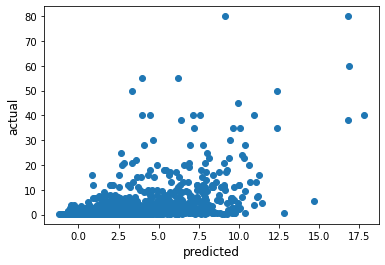

In [788]:
plt.scatter(test_set_pred, y_test)
plt.xlabel('predicted', size = 12)
plt.ylabel('actual', size = 12)

## Predicted vs residual

Residuals - how far off are we?

In [789]:
resid = test_set_pred-y_test

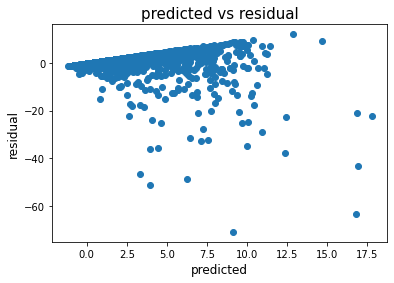

In [790]:
plt.scatter(test_set_pred, resid)
plt.xlabel('predicted', size=12)
plt.ylabel('residual', size = 12)
plt.title('predicted vs residual', size = 15);
# plt.title('predicted vs residual (log transformed target)', size = 15); # for log transfored

### Note: Residual plot improves with log transformed y. However, used untransformed dataset to make error interpretable in units of y.

# RMSE and MAE

## MSE

In [791]:
mean_squared_error(y_test, test_set_pred,  squared=True)

15.942259196186322

## RMSE

In [792]:
mean_squared_error(y_test, test_set_pred,  squared=False)

3.9927758760273937

## MAE

In [793]:
def mean_abs_err(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

1.499174175023646

MAE vs RMSE Notes:

"Differences: Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable."

MAE perhaps more appropriate for this